In [71]:
#Import packages
import random
import os, sys
from collections import Counter
import pytz
import pandas as pd
import numpy as np
from datetime import datetime, date, time, timedelta
import re
from IPython.display import Image
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
%matplotlib inline 
plt.rcParams.update(plt.rcParamsDefault)

In [45]:
data_dir = "/Users/dmatekenya/Google-Drive/worldbank/smart-survey-boxes/data/"
sum_file_1 = os.path.join(data_dir,'processed-sms', 'daily_outage_duration_actual.csv')
sum_file_2 = os.path.join(data_dir,'processed-sms', 'daily_outage_duration.csv')
comp =  os.path.join(data_dir,"processed-smsoutage_summary_comparison.csv")

In [ ]:
df_c = pd.read_csv(comp)
df_c

In [ ]:
ax = plt.subplot(111)
t1 = np.arange(0.0, 1.0, 0.01)
for n in [1, 2, 3, 4]:
    plt.plot(t1, t1**n, label="n=%d"%(n,))

leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.5)


plt.show()

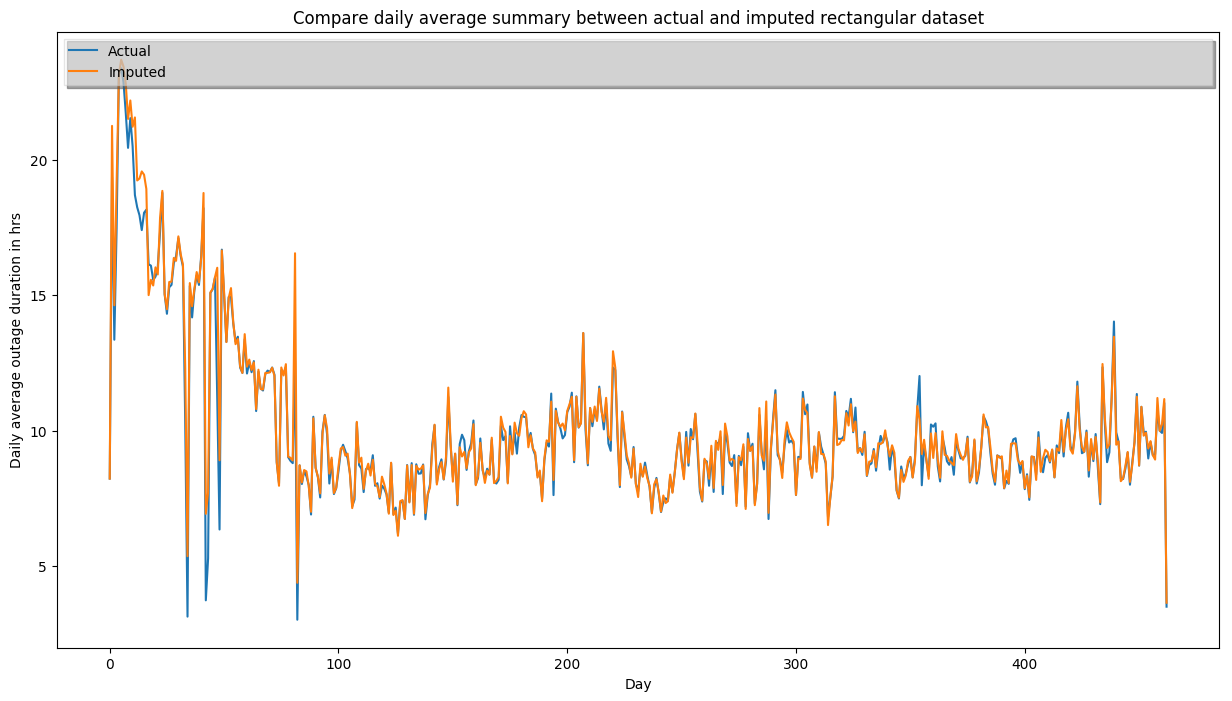

In [98]:
ax = plt.subplot(111)
ax.figure.set_size_inches(15,8)
plt.plot(df_c.avg_hrs_power_off_actual, label="Actual")
plt.plot(df_c.avg_hrs_power_off_imputed, label="Imputed")
leg = plt.legend(loc='upper right', ncol=1, mode="expand", shadow=True, fancybox=False)
leg.get_frame().set_alpha(0.5)
ax.set_title('Compare daily average summary between actual and imputed rectangular dataset')
ax.set_xlabel('Day')
ax.set_ylabel('Daily average outage duration in hrs')
plt.show()
ax.figure.savefig('comparison.png')

In [97]:
print(dir(leg))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_agg_filter', '_alpha', '_animated', '_approx_text_height', '_auto_legend_data', '_axes', '_bbox_to_anchor', '_clipon', '_clippath', '_contains', '_custom_handler_map', '_default_handler_map', '_draggable', '_drawFrame', '_find_best_position', '_findoffset_best', '_findoffset_loc', '_fontsize', '_get_anchored_bbox', '_get_loc', '_gid', '_init_legend_box', '_label', '_last_fontsize_points', '_legend_box', '_legend_handle_box', '_legend_title_box', '_loc', '_loc_real', '_mode', '_mouseover', '_ncol', '_oid', '_path_effects', '_picker', '_prop_order', '_propobservers', '_rasterized', '_remove_method', '_scatteryoffsets', '_set_artist

In [86]:
fig = ax.figure
print(dir(ax))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_add_text', '_adjustable', '_agg_filter', '_alpha', '_anchor', '_animated', '_aspect', '_autoscaleXon', '_autoscaleYon', '_axes', '_axes_class', '_axes_locator', '_axisbelow', '_cachedRenderer', '_clipon', '_clippath', '_connected', '_contains', '_current_image', '_cursorProps', '_facecolor', '_frameon', '_gci', '_gen_axes_patch', '_gen_axes_spines', '_get_axis_list', '_get_legend_handles', '_get_lines', '_get_patches_for_fill', '_get_view', '_gid', '_gridOn', '_hold', '_init_axis', '_label', '_left_title', '_make_twin_axes', '_mouseover', '_navigate', '_navigate_mode', '_oid', '_originalPosition', '_path_effects',

In [6]:
df_sum1 = pd.read_csv(sum_file_1)
df_sum2 = pd.read_csv(sum_file_2)

In [7]:
df_sum1.head()

,date_sent,hrs_power_off,hrs_power_off_10pm,box_id
0,2016-10-19,14,0,1301
1,2016-10-19,14,9,1301
2,2016-10-20,24,0,1301
3,2016-10-20,24,19,1301
4,2016-10-21,15,15,1301


In [31]:
df_grp = df_sum1.groupby(['date_sent'])['hrs_power_off'].mean()
df_grp = pd.DataFrame(df_grp).reset_index()
df_grp.sort_values(by='date_sent', inplace=True)
df_grp.insert(0, 'day', range(1, len(df_grp)+1))


In [36]:
df_grp1 = df_sum2.groupby(['date_sent'])['hrs_power_off'].mean()
df_grp1 = pd.DataFrame(df_grp1).reset_index()
df_grp1.sort_values(by='date_sent', inplace=True)
df_grp1.insert(0, 'day', range(1, len(df_grp1)+1))

In [38]:
df = pd.merge(left=df_grp, right=df_grp1, on ='day', suffixes=['actual', 'imputed'])

In [ ]:
df['abs_diff'] = df.apply(lambda  x: abs(x[hrs_power_off_y]-x[hrs_power_off_yl]))

In [43]:
df['hrs_power_off_x'].mean()

10.013059294413694

In [44]:
df

,day,date_sent_x,hrs_power_off_x,date_sent_y,hrs_power_off_y
0,1,2016-10-19,8.226891,2016-10-19,8.226891
1,2,2016-10-20,19.364964,2016-10-20,19.364964
2,3,2016-10-21,13.359073,2016-10-21,13.359073
3,4,2016-10-22,17.457801,2016-10-22,17.457801
4,5,2016-10-23,23.174334,2016-10-23,23.174334
5,6,2016-10-24,23.392947,2016-10-24,23.392947
6,7,2016-10-25,22.886427,2016-10-25,22.886427
7,8,2016-10-26,21.745098,2016-10-26,21.745098
8,9,2016-10-27,20.450000,2016-10-27,20.450000
9,10,2016-10-28,21.549254,2016-10-28,21.549254


In [23]:
df_grp[df_grp.date_sent == '2016-10-19']

,date_sent,hrs_power_off
0,2016-10-19,3
1,2016-10-19,5
2,2016-10-19,6
3,2016-10-19,7
4,2016-10-19,8
5,2016-10-19,9
6,2016-10-19,13
7,2016-10-19,14


In [3]:
# Get the data: sms_rect_hr.csv'
cols_to_use = ['box_id', 'psu', 'lon', 'lat', 'str_datetime_sent_hr', 'day_sent', 'hour_sent', 'month_sent',
                   'wk_day_sent', 'wk_end', 'event_type_num', 'event_type_str', 'power_state', 'data_source']
sms1 = pd.read_csv(data_dir + 'sms_observed.csv', parse_dates=['str_datetime_sent', 'str_datetime_sent_hr'])
sms2 = pd.read_csv(data_dir + 'sms_rect_hr.csv', usecols=cols_to_use, parse_dates=['str_datetime_sent_hr'])
sms2.rename(columns={'str_datetime_sent_hr': 'datetime_sent_hr'}, inplace=True)

# Remove missing values
sms2 = sms2[sms2.power_state != -1]

In [4]:
sms1_state = sms1[sms1['event_type_str'].isin(['pfail','pback'])]
sms1_state_elaps = ut.add_elapsed_time_to_dataframe(sms1_state)
sms1_all_elaps = ut.add_elapsed_time_to_dataframe(sms1)

In [10]:
sms1_state_elaps.event_type_str.value_counts(normalize=True)

pfail    0.506504
pback    0.493496
Name: event_type_str, dtype: float64

In [6]:
sms1_state_elaps.time_elapsed_hrs.describe()

count    137452.000000
mean         12.790632
std          85.546170
min           0.000000
25%           0.000000
50%           0.000000
75%           6.000000
max        6223.000000
Name: time_elapsed_hrs, dtype: float64

In [9]:
sms1_all_elaps.event_type_str.value_counts(normalize=True)

pon_mon      0.414219
pfail        0.263175
pback        0.256416
pfail_mon    0.066191
Name: event_type_str, dtype: float64

In [8]:
sms1_all_elaps.time_elapsed_hrs.describe()

count    264539.000000
mean          6.721172
std          55.192265
min           0.000000
25%           0.000000
50%           3.000000
75%          12.000000
max        6215.000000
Name: time_elapsed_hrs, dtype: float64

**Event sequences**
===========

In [13]:
events = list(sms1.event_type_str)
transition_matrix = pd.DataFrame(index=list(set(events)),columns=list(set(events)))

for (x,y), c in Counter(zip(events, events[1:])).items():
    transition_matrix.loc[x][y] = c
    #print(x,y, c)

transition_matrix

,pfail,pfail_mon,pback,pon_mon
pfail,2613,9657,56204,1146
pfail_mon,949,4727,9176,2658
pback,37997,664,1906,27264
pon_mon,28060,2462,546,78509
